In [1]:
import pandas as pd
from sklearn.metrics import (
    average_precision_score,
    roc_auc_score,
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
predictions = pd.read_csv("/home/gathenes/paragraph_benchmark/convex_hull/z_lr-0.00001_dr-0.4,0.3,0.2_mk-0.4_bs-15_dim1-4000,2000,500_alphas-5_pen-0_weight_1_--bigembedding_multi__/prediction.csv")


<Axes: title={'center': 'Column1 vs Column2'}, xlabel='distances', ylabel='prediction'>

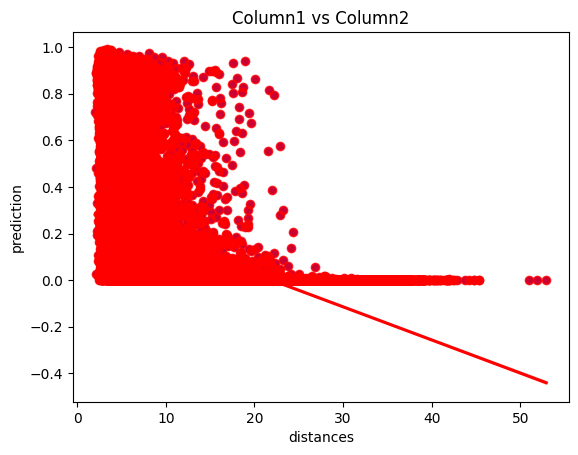

In [3]:
# Plotting column1 against column2
predictions.plot(x='distances', y='prediction', kind='scatter', title="Column1 vs Column2", color="blue")
sns.regplot(x='distances', y='prediction', data=predictions, color="red")


In [4]:
predictions["IMGT_bis"] = predictions["IMGT"].str.replace(r'[a-zA-Z]$', '', regex=True).astype(int)
cdr1 = list(range(27, 38 + 1))
cdr2=list(range(56, 65 + 1))
cdr3=list(range(105, 117 + 1))
cdrs = list(range(25, 40 + 1)) + list(range(54, 67 + 1)) + list(range(103, 119 + 1))


In [5]:
preds_cdrs=predictions.query("IMGT_bis in @cdrs")["prediction"].tolist()
labs_cdrs=predictions.query("IMGT_bis in @cdrs")["labels"].tolist()


In [6]:
cv_framework=predictions.query("IMGT_bis not in @cdrs")["convex_hull"].tolist()
preds_framework=predictions.query("IMGT_bis not in @cdrs")["prediction"].tolist()
labs_framework=(predictions.query("IMGT_bis not in @cdrs")["labels"]).tolist()


In [7]:
total_preds = preds_cdrs+preds_framework
total_labs=labs_cdrs+labs_framework


In [8]:
import numpy as np
ap = average_precision_score(total_labs, total_preds)
ap_cdrs = average_precision_score(labs_cdrs, preds_cdrs)
ap_framework = average_precision_score(np.array(labs_framework), np.array(preds_framework))


In [9]:
print(ap, ap_cdrs, ap_framework)


0.7270427331778189 0.7492326058414173 0.2885323949344104


In [10]:
import pandas as pd
from sklearn.metrics import average_precision_score

# Assuming `predictions` DataFrame is already defined

# Step 1: Convert "IMGT" column to numeric after removing letters
predictions["IMGT_bis"] = predictions["IMGT"].str.replace(r'[a-zA-Z]$', '', regex=True).astype(int)

# Define CDR ranges
cdr_ranges = {
    "cdr1": list(range(27, 38 + 1)),
    "cdr2": list(range(56, 65 + 1)),
    "cdr3": list(range(105, 117 + 1))
}

# Initialize a dictionary to store AP scores for each CDR
ap_scores = {}

for cdr_name, cdr_range in cdr_ranges.items():
    preds_cdr = predictions.query("IMGT_bis in @cdr_range and chain_type=='light'")["prediction"].tolist()
    labs_cdr = predictions.query("IMGT_bis in @cdr_range and chain_type=='light'")["labels"].tolist()
    ap_scores[cdr_name] = average_precision_score(labs_cdr, preds_cdr)

# Display the AP scores for each CDR
print("Average Precision Scores by CDR:")
for cdr, score in ap_scores.items():
    print(f"{cdr} light: {score}")

# Step 2: Calculate AP score for each CDR
for cdr_name, cdr_range in cdr_ranges.items():
    preds_cdr = predictions.query("IMGT_bis in @cdr_range and chain_type=='heavy'")["prediction"].tolist()
    labs_cdr = predictions.query("IMGT_bis in @cdr_range and chain_type=='heavy'")["labels"].tolist()
    ap_scores[cdr_name] = average_precision_score(labs_cdr, preds_cdr)

# Display the AP scores for each CDR
print("Average Precision Scores by CDR:")
for cdr, score in ap_scores.items():
    print(f"{cdr} heavy: {score}")


Average Precision Scores by CDR:
cdr1 light: 0.7586930793695318
cdr2 light: 0.5805366580313819
cdr3 light: 0.7587022461526179
Average Precision Scores by CDR:
cdr1 heavy: 0.7270926177009996
cdr2 heavy: 0.7990506958411646
cdr3 heavy: 0.7542836285197275
